In [1]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________

import CONFIG
import DBPARSE
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend


Welcome to JupyROOT 6.26/06


In [3]:
pas="1"
config="2"

# Current cuts

In [9]:
W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")

print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')

W2min: 0
W2max: 1.35
dxmin: -0.481
dxmax: 0.498
dymin: -0.822
dymax: 1.155
dybgmin: -1.4
dybgmax: 1.4
Coin Min: 91 Coin Max: 109


# Load the root file

In [4]:
fileDIR=(f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root")
resolved_path = os.path.abspath(fileDIR)
print(f"Resolved Path: {resolved_path}")
print(f"File Exists: {os.path.exists(resolved_path)}")


r.gErrorIgnoreLevel = r.kError  # Suppress Info and Warning messages

r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1)


rootfilenp = f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root"
rootfilep = f"../outfiles/Pass1/QE_sim_GEN{config}_sbs100p_nucleon_np_model2.root"


B = r.TChain("Tout")
C = r.TChain("Tout")
#_________________________________________Define Variables
dx_np = array.array('d', [0])
dx_p = array.array('d', [0])
dy_np = array.array('d', [0])
dy_p = array.array('d', [0])
W2_np = array.array('d', [0])
W2_p = array.array('d', [0])
coin_np = array.array('d', [0])
weight = array.array('d', [0])
helicity_p = array.array('i', [0])
IHWP_p = array.array('i', [0])
runnum_p = array.array('i', [0])
helicity_np = array.array('i', [0])
IHWP_np = array.array('i', [0])
runnum_np = array.array('i', [0])
#_________________________________________Define Variables

C.Add(rootfilenp)
B.Add(rootfilep)
C.SetBranchStatus("*", 0)
B.SetBranchStatus("*", 0)
branches = ["dx", "dy", "W2", "helicity", "IHWP", "runnum", "coinCut", "coin_time"]
b2=["dx", "dy", "W2","fnucl"]
for branch in branches:
    C.SetBranchStatus(branch, 1)
for branch in b2:
    B.SetBranchStatus(branch, 1)
B.SetBranchStatus("weight", 1)
C.SetBranchAddress("dx", dx_np)
B.SetBranchAddress("dx", dx_p)
C.SetBranchAddress("dy", dy_np)
B.SetBranchAddress("dy", dy_p)
C.SetBranchAddress("W2", W2_np)
B.SetBranchAddress("W2", W2_p)
C.SetBranchAddress("helicity", helicity_np)
C.SetBranchAddress("IHWP", IHWP_np)
C.SetBranchAddress("coin_time", coin_np)
C.SetBranchAddress("runnum", runnum_np)
B.SetBranchAddress("weight", weight)
B.SetBranchAddress("fnucl", fnucl)




nEntries_np = C.GetEntries()
nEntries_p = B.GetEntries()



Resolved Path: /home/research/GEn/GEn Data Analysis/outfiles/Pass1/QE_data_GEN2_sbs100p_nucleon_np_model2.root
File Exists: True


Error in <TList::Clear>: A list is accessing an object (0x92c8900) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x92c8dd0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x92c9010) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x92fb2f0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x92fb660) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x92fb9d0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x92fbe30) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x9506ff0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x9507400) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x9507810) alread

# W2

#### Start by checking statistics in a dx, dy, coin cut with varying W2

In [23]:
granularity=50 # number of increments in W2
W2top=2
scaler = np.arange(1,granularity)
W2array=np.empty(0)
for i in range(0,len(scaler)):
    W2array=np.append(W2array,W2top*scaler[i]/len(scaler))

In [25]:
Y=np.empty(0)
for j in range(0,len(W2array)):
    counts=0
    
    for i in range(nEntries_np):
        C.GetEntry(i)
        if IHWP_np[0] == 1:
            helicity_np[0] *= -1
        elif IHWP_np[0] == -1:
            helicity_np[0] *= 1
        else:
            continue
        #____________CUTS_______________________________      
        ycut = dymin < dy_np[0] < dymax
        bgycut=dybgmin<dy_np[0]<dybgmax
        coin_cut = coinmin < coin_np[0] < coinmax
        W2cut=W2min < W2_np[0] < W2array[j]
        xcutn = dxmin < dx_np[0] < dxmax
        #________________________________________________ 
        if coin_cut and W2cut and runnum_np[0] > 2165 and ycut:
            counts+=1
            #if helicity_np[0] == 1:
            #    hdx_bg_data_plus.Fill(dx_np[0])
            #if helicity_np[0] == -1:
            #    hdx_bg_data_minus.Fill(dx_np[0])
            
    Y=np.append(Y,counts)
    print(f'Loops Completed {j+1}/{len(W2array)+1} \r',)

Loops Completed 1/50 
Loops Completed 2/50 
Loops Completed 3/50 
Loops Completed 4/50 
Loops Completed 5/50 
Loops Completed 6/50 
Loops Completed 7/50 
Loops Completed 8/50 
Loops Completed 9/50 
Loops Completed 10/50 
Loops Completed 11/50 
Loops Completed 12/50 
Loops Completed 13/50 
Loops Completed 14/50 
Loops Completed 15/50 
Loops Completed 16/50 
Loops Completed 17/50 
Loops Completed 18/50 
Loops Completed 19/50 
Loops Completed 20/50 
Loops Completed 21/50 
Loops Completed 22/50 
Loops Completed 23/50 
Loops Completed 24/50 
Loops Completed 25/50 
Loops Completed 26/50 
Loops Completed 27/50 
Loops Completed 28/50 
Loops Completed 29/50 
Loops Completed 30/50 
Loops Completed 31/50 
Loops Completed 32/50 
Loops Completed 33/50 
Loops Completed 34/50 
Loops Completed 35/50 
Loops Completed 36/50 
Loops Completed 37/50 
Loops Completed 38/50 
Loops Completed 39/50 
Loops Completed 40/50 
Loops Completed 41/50 
Loops Completed 42/50 
Loops Completed 43/50 
Loops Completed 44/5

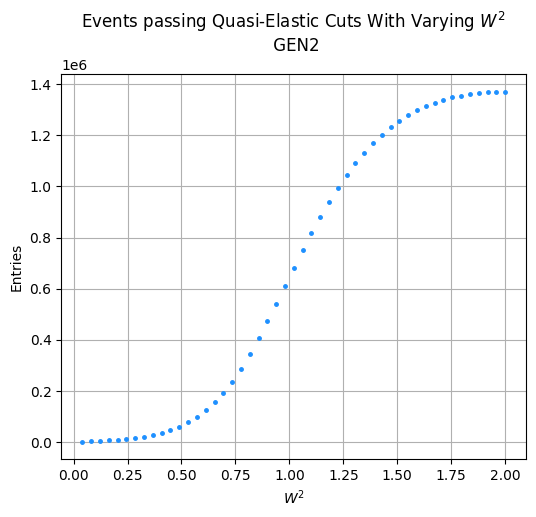

In [43]:
plt.figure(figsize=(6,5))
plt.plot(W2array,Y,'.',color='dodgerblue',markersize=5)
plt.title(f"Events passing Quasi-Elastic Cuts With Varying $W^2$ \n GEN{config}")
plt.ylabel("Entries")
plt.xlabel("$W^2$")
plt.grid()
plt.savefig("../plots/cutselection/VaryW2.png")
np.save(f'CutSelectionArrays/Pass{pas}/VaryW2_W2{config}.npy',W2array)
np.save(f'CutSelectionArrays/Pass{pas}/VaryW2_Y{config}.npy',Y)



# $\Delta X$

# $\Delta Y$

# $\Delta Y$ Background

# Coincidence